In [1]:
'''
feature_extraction.py
A file related with extracting feature.
For the baseline code it loads audio files and extract mel-spectrogram using Librosa.
Then it stores in the './feature' folder.
'''
import os
import numpy as np
import librosa

# import argparse

class HParams(object):
	def __init__(self):
		# Dataset Settings
		self.dataset_path = 'D:\다운로드\gtzan'
		self.feature_path = './feature2'
		self.genres = ['classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae']

		# Feature Parameters
		self.sample_rate = 22050
		self.fft_size = 1024
		self.win_size = 1024
		self.hop_size = 512
		self.num_mels = 128
		self.feature_length = 1024  # audio length = feature_length*hop_size/sample_rate (s)

		# Training Parameters
		self.device = 1  # 0: CPU, 1: GPU0, 2: GPU1, ...
		self.batch_size = 10
		self.num_epochs = 100
		self.learning_rate = 1e-2
		self.stopping_rate = 1e-10
		self.weight_decay = 1e-6
		self.momentum = 0.9
		self.factor = 0.2
		self.patience = 3.

hparams = HParams() 
        

def load_list(list_name, hparams):
	with open(os.path.join(hparams.dataset_path, list_name)) as f:
		file_names = f.read().splitlines()

	return file_names

def melspectrogram(file_name, hparams):
    
    #librosa로 load 및 변환 
	y, sr = librosa.load(os.path.join(hparams.dataset_path, file_name), hparams.sample_rate)
	S = librosa.stft(y, n_fft=hparams.fft_size, hop_length=hparams.hop_size, win_length=hparams.win_size)

	mel_basis = librosa.filters.mel(hparams.sample_rate, n_fft=hparams.fft_size, n_mels=hparams.num_mels)
	mel_S = np.dot(mel_basis, np.abs(S))
	mel_S = np.log10(1+10*mel_S)
	mel_S = mel_S.T

	return mel_S

def resize_array(array, length):
	resized_array = np.zeros((length, array.shape[1]))
	if array.shape[0] >= length:
		resized_array = array[:length]
	else:
		resized_array[:array.shape[0]] = array

	return resized_array

def main():
	print('Extracting Feature')
	list_names = ['train_list.txt', 'valid_list.txt', 'test_list.txt']

	for list_name in list_names:
		set_name = list_name.replace('_list.txt', '')
		file_names = load_list(list_name, hparams)

		for file_name in file_names:
			feature = melspectrogram(file_name, hparams)
			feature = resize_array(feature, hparams.feature_length)
            
			for i in range(6):
				sub = feature[:,i*128:(i+3)*128].copy()
				save_path = os.path.join(hparams.feature_path, set_name, file_name.split('/')[0])
				save_name = file_name.split('/')[1].replace('.wav',str(i)+'.npy' )

				if not os.path.exists(save_path):
					os.makedirs(save_path)
					np.save(os.path.join(save_path, save_name), feature.astype(np.float32))
					print(os.path.join(save_path, save_name))

	print('finished')

In [165]:
'''기존 npy 파일을 6조각으로 
- 파일 읽기
- 파일 자르기
- 새 이름으로 저장
- 이름 txt파일에 기록'''



'기존 npy 파일을 6조각으로 \n- 파일 읽기\n- 파일 자르기\n- 새 이름으로 저장\n- 이름 txt파일에 기록'

In [166]:
feature_path = './feature'
import numpy as np

In [167]:
f= np.load('./feature/train/classical/classical.00030.npy')
f = np.transpose(f)
f.shape

flist=[]


for i in range(6):
    sub = f[:,i*128:(i+3)*128].copy()
    flist.append(sub)

# f1 = f[:,:128*3].copy()
# f2 = f[:,128:128*4].copy()
# f3 = f[:,128*2:128*5].copy()
# f4 = f[:,128*3:128*6].copy()
# f5 = f[:,128*4:128*7].copy()


flist[0].shape

(128, 384)

In [2]:
#npy 데이터 생성
def sub_data():
	list_names = ['train_list.txt', 'valid_list.txt', 'test_list.txt']

	for list_name in list_names:
		set_name = list_name.replace('_list.txt', '')
		file_names = load_list(list_name, hparams)

		for file_name in file_names:
			feature = melspectrogram(file_name, hparams)
			feature = resize_array(feature, hparams.feature_length)

			save_path = os.path.join(hparams.feature_path, set_name, file_name.split('/')[0])
			save_name = file_name.split('/')[1].replace('.wav', '.npy')
			if not os.path.exists(save_path):
				os.makedirs(save_path)

			np.save(os.path.join(save_path, save_name), feature.astype(np.float32))
			print(os.path.join(save_path, save_name))

	print('finished')

D:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


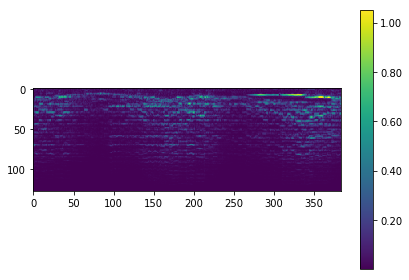

In [169]:
plt.imshow(flist[0])

plt.colorbar(format='%1.2f')
plt.tight_layout()
plt.grid('off')
plt.show()

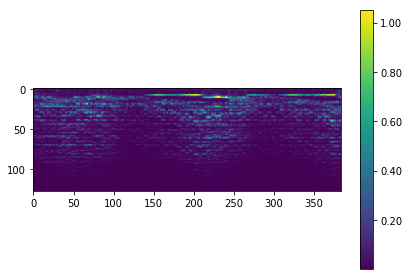

In [170]:
plt.imshow(flist[1])

plt.colorbar(format='%1.2f')
plt.tight_layout()
plt.grid('off')
plt.show()

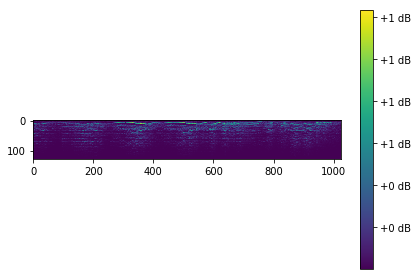

In [171]:
import librosa
import librosa.display
import matplotlib.pyplot as plt



plt.imshow(f)

plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.grid('off')
plt.show()

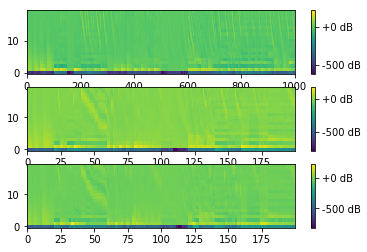

In [32]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

data_path = './dataset/'
mfcc_path = './mfcc/'

MFCC_DIM = 20

def mean_mfcc(dataset='train'):
    
    f = open(data_path + dataset + '_list.txt','r')

    if dataset == 'train':
        mfcc_mat = np.zeros(shape=(MFCC_DIM, 1000))
    else:
        mfcc_mat = np.zeros(shape=(MFCC_DIM, 200))

    i = 0
    for file_name in f:

        # load mfcc file
        file_name = file_name.rstrip('\n')
        file_name = file_name.replace('.wav','.npy')
        mfcc_file = mfcc_path + file_name
        mfcc = np.load(mfcc_file)

        # mean pooling
        temp = np.mean(mfcc, axis=1)
        mfcc_mat[:,i]= np.mean(mfcc, axis=1)
        i = i + 1

    f.close();

    return mfcc_mat
        
if __name__ == '__main__':
    train_data = mean_mfcc('train')
    valid_data = mean_mfcc('valid')
    test_data = mean_mfcc('test')

    plt.figure(1)
    plt.subplot(3,1,1)
    plt.imshow(train_data, interpolation='nearest', origin='lower', aspect='auto')
    plt.colorbar(format='%+2.0f dB')

    plt.subplot(3,1,2)
    plt.imshow(valid_data, interpolation='nearest', origin='lower', aspect='auto')
    plt.colorbar(format='%+2.0f dB')

    plt.subplot(3,1,3)
    plt.imshow(test_data, interpolation='nearest', origin='lower', aspect='auto')
    plt.colorbar(format='%+2.0f dB')
    plt.show()


In [3]:
'''
data_manager.py
A file that loads saved features and convert them into PyTorch DataLoader.
'''
import os
import numpy as np
from torch.utils.data import Dataset, DataLoader

# Class based on PyTorch Dataset
class GTZANDataset(Dataset):
	def __init__(self, x, y):
		self.x = x
		self.y = y

	def __getitem__(self, index):
		return self.x[index], self.y[index]

	def __len__(self):
		return self.x.shape[0]

# Function to get genre index for the given file
def get_label(file_name, hparams):
	genre = file_name.split('.')[0]
	label = hparams.genres.index(genre)

	return label

# Function for loading entire data from given dataset and return numpy array
def load_dataset(set_name, hparams):
	x = []
	y = []

	dataset_path = os.path.join(hparams.feature_path, set_name)
	for root, dirs, files in os.walk(dataset_path):
		for file in files:
			data = np.load(os.path.join(root, file))
			label = get_label(file, hparams)
			x.append(data)
			y.append(label)

	x = np.stack(x)
	y = np.stack(y)

	return x, y

# Function to load numpy data and normalize, it returns dataloader for train, valid, test
def get_dataloader(hparams):
	x_train, y_train = load_dataset('train', hparams)
	x_valid, y_valid = load_dataset('valid', hparams)
	x_test, y_test = load_dataset('test', hparams)

	mean = np.mean(x_train)
	std = np.std(x_train)
	x_train = (x_train - mean)/std
	x_valid = (x_valid - mean)/std
	x_test = (x_test - mean)/std

	train_set = GTZANDataset(x_train, y_train)
	valid_set = GTZANDataset(x_valid, y_valid)
	test_set = GTZANDataset(x_test, y_test)

	train_loader = DataLoader(train_set, batch_size=hparams.batch_size, shuffle=True, drop_last=False)
	valid_loader = DataLoader(valid_set, batch_size=hparams.batch_size, shuffle=False, drop_last=False)
	test_loader = DataLoader(test_set, batch_size=hparams.batch_size, shuffle=False, drop_last=False)

	return train_loader, valid_loader, test_loader

In [4]:
def main():
	print('Extracting Feature')
	list_names = ['train_list.txt', 'valid_list.txt', 'test_list.txt']

	for list_name in list_names:
		set_name = list_name.replace('_list.txt', '')
		file_names = load_list(list_name, hparams)

		for file_name in file_names:
			feature = melspectrogram(file_name, hparams)
			feature = resize_array(feature, hparams.feature_length)
            
			for i in range(6):
				sub = feature[:,i*128:(i+3)*128].copy()
				save_path = os.path.join(hparams.feature_path, set_name, file_name.split('/')[0])
				save_name = file_name.split('/')[1].replace('.wav',str(i)+'.npy' )

				if not os.path.exists(save_path):
					os.makedirs(save_path)
					np.save(os.path.join(save_path, save_name), feature.astype(np.float32))
					print(os.path.join(save_path, save_name))

	print('finished')

In [14]:
import os
import numpy as np
import librosa

class HParams(object):
    def __init__(self):
        # Dataset Settings
        self.dataset_path = 'd:/다운로드/gtzan'
        self.feature_path = './feature'
        self.genres = ['classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae']

        # Feature Parameters
        self.sample_rate = 22050
        self.fft_size = 1024
        self.win_size = 1024
        self.hop_size = 512
        self.num_mels = 128
        self.feature_length = 1024  # audio length = feature_length*hop_size/sample_rate (s)

        # Training Parameters
        self.device = 1  # 0: CPU, 1: GPU0, 2: GPU1, ...
        self.batch_size = 10
        self.num_epochs = 100
        self.learning_rate = 1e-2
        self.stopping_rate = 1e-10
        self.weight_decay = 1e-6
        self.momentum = 0.9
        self.factor = 0.2
        self.patience = 3.

hparams = HParams() 
        
from os import walk

def load_list(set_name,genre):
    file_names = []
    for (dirpath, dirnames, filenames) in walk('./feature/'+set_name+'/'+genre):
        for file in filenames :
            file_names.append(file)
    return file_names




                    
                        

In [15]:
def split_feature():
    print('start')
    set_names = ['train', 'valid', 'test']
    genres = ['classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae']
    
    for set_name in set_names:
        for genre in genres:
            file_names = load_list(set_name, genre)
            #기존 파일 호출
            for file in file_names:
                file_data = np.load('./feature/'+set_name+'/'+genre+'/'+file)
                #분할하여 저장
                for i in range(3):
                    sub = file_data[i*128:512+i*128,:].copy()
                    save_name = file.replace('.npy',str(i)+'.npy')
                    save_path = './slice1/'+set_name+'/'+genre
                    if not os.path.exists(save_path):
                        os.makedirs(save_path)
                    np.save(os.path.join(save_path, save_name), sub.astype(np.float32))
                    print(os.path.join(save_path, save_name))

In [16]:
def feature():
    print('start')
    set_names = ['train', 'valid', 'test']
    genres = ['classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae']
    
    for set_name in set_names:
        for genre in genres:
            file_names = load_list(set_name, genre)
            #기존 파일 호출
            for file in file_names:
                file_data = np.load('./feature/'+set_name+'/'+genre+'/'+file)
                #분할하여 저장
                for i in range(3):
                    sub = file_data[i*128:512+i*128,:].copy()
                    save_name = file.replace('.npy',str(i)+'.npy')
                    save_path = './slice1/'+set_name+'/'+genre
                    if not os.path.exists(save_path):
                        os.makedirs(save_path)
                    np.save(os.path.join(save_path, save_name), sub.astype(np.float32))
                    print(os.path.join(save_path, save_name))

In [17]:
import librosa
import numpy as np
import os

def get_genre(hparams):
    return hparams.genres

def load_list(list_name, hparams):
    with open(os.path.join(hparams.dataset_path, list_name)) as f:
        file_names = f.read().splitlines()

    return file_names

def get_item(hparams, genre):
    return librosa.util.find_files(hparams.dataset_path + '/' + str(genre))


def readfile(file_name, hparams):
    y, sr = librosa.load(file_name, hparams.sample_rate)
    return y, sr


def change_pitch_and_speed(data):
    y_pitch_speed = data.copy()
    # you can change low and high here
    length_change = np.random.uniform(low=0.8, high=1)
    speed_fac = 1.0 / length_change
    tmp = np.interp(np.arange(0, len(y_pitch_speed), speed_fac), np.arange(0, len(y_pitch_speed)), y_pitch_speed)
    minlen = min(y_pitch_speed.shape[0], tmp.shape[0])
    y_pitch_speed *= 0
    y_pitch_speed[0:minlen] = tmp[0:minlen]
    return y_pitch_speed


def change_pitch(data, sr):
    y_pitch = data.copy()
    bins_per_octave = 12
    pitch_pm = 2
    pitch_change = pitch_pm * 2 * (np.random.uniform())
    y_pitch = librosa.effects.pitch_shift(y_pitch.astype('float64'), sr, n_steps=pitch_change,
                                          bins_per_octave=bins_per_octave)
    return y_pitch

def value_aug(data):
    y_aug = data.copy()
    dyn_change = np.random.uniform(low=1.5, high=3)
    y_aug = y_aug * dyn_change
    return y_aug


def add_noise(data):
    noise = np.random.randn(len(data))
    data_noise = data + 0.005 * noise
    return data_noise


def hpss(data):
    y_harmonic, y_percussive = librosa.effects.hpss(data.astype('float64'))
    return y_harmonic, y_percussive


def shift(data):
    return np.roll(data, 1600)


def stretch(data, rate=1):
    input_length = len(data)
    streching = librosa.effects.time_stretch(data, rate)
    if len(streching) > input_length:
        streching = streching[:input_length]
    else:
        streching = np.pad(streching, (0, max(0, input_length - len(streching))), "constant")
    return streching

def change_speed(data):
    y_speed = data.copy()
    speed_change = np.random.uniform(low=0.9, high=1.1)
    tmp = librosa.effects.time_stretch(y_speed.astype('float64'), speed_change)
    minlen = min(y_speed.shape[0], tmp.shape[0])
    y_speed *= 0
    y_speed[0:minlen] = tmp[0:minlen]
    return y_speed


def main():
    print('Augmentation')
    genres = get_genre(hparams)
    list_names = ['train_list.txt']
    for list_name in list_names:
        file_names = load_list(list_name, hparams)
        with open(os.path.join(hparams.dataset_path, list_name),'w') as f:
            for i in file_names:
                f.writelines(i+'\n')
                f.writelines(i.replace('.wav', 'a.wav' + '\n'))
                f.writelines(i.replace('.wav', 'b.wav' + '\n'))
                f.writelines(i.replace('.wav', 'c.wav' + '\n'))
                f.writelines(i.replace('.wav', 'd.wav' + '\n'))
                f.writelines(i.replace('.wav', 'e.wav' + '\n'))
                f.writelines(i.replace('.wav', 'f.wav' + '\n'))
                f.writelines(i.replace('.wav', 'g.wav' + '\n'))
                f.writelines(i.replace('.wav', 'h.wav' + '\n'))
                f.writelines(i.replace('.wav', 'i.wav' + '\n'))

    for genre in genres:
        item_list = get_item(hparams, genre)
        for file_name in item_list:
            y, sr = readfile(file_name, hparams)
            data_noise = add_noise(y)
            data_roll = shift(y)
            data_stretch = stretch(y)
            pitch_speed = change_pitch_and_speed(y)
            pitch = change_pitch(y, hparams.sample_rate)
            speed = change_speed(y)
            value = value_aug(y)
            y_harmonic, y_percussive = hpss(y)
            y_shift = shift(y)

            save_path = os.path.join(file_name.split(genre + '.')[0])
            save_name =  genre + '.'+file_name.split(genre + '.')[1]
            print(save_name)

            librosa.output.write_wav(os.path.join(save_path, save_name.replace('.wav', 'a.wav')), data_noise, hparams.sample_rate)
            librosa.output.write_wav(os.path.join(save_path, save_name.replace('.wav', 'b.wav')), data_roll, hparams.sample_rate)
            librosa.output.write_wav(os.path.join(save_path, save_name.replace('.wav', 'c.wav')), data_stretch, hparams.sample_rate)
            librosa.output.write_wav(os.path.join(save_path, save_name.replace('.wav', 'd.wav')), pitch_speed, hparams.sample_rate)
            librosa.output.write_wav(os.path.join(save_path, save_name.replace('.wav', 'e.wav')), pitch, hparams.sample_rate)
            librosa.output.write_wav(os.path.join(save_path, save_name.replace('.wav', 'f.wav')), speed, hparams.sample_rate)
            librosa.output.write_wav(os.path.join(save_path, save_name.replace('.wav', 'g.wav')), value, hparams.sample_rate)
            librosa.output.write_wav(os.path.join(save_path, save_name.replace('.wav', 'h.wav')), y_percussive, hparams.sample_rate)
            librosa.output.write_wav(os.path.join(save_path, save_name.replace('.wav', 'i.wav')), y_shift, hparams.sample_rate)
        
        print('finished')


if __name__ == '__main__':
    main()

Augmentation
classical.00000.wav


NoBackendError: 

In [13]:
def load_list(list_name, hparams):
    with open(os.path.join(hparams.dataset_path, list_name)) as f:
        file_names = f.read().splitlines()

    return file_names

def melspectrogram(file_name, hparams):
    #librosa로 load 및 변환 
    y, sr = librosa.load(os.path.join(hparams.dataset_path, file_name), hparams.sample_rate)
    S = librosa.stft(y, n_fft=hparams.fft_size, hop_length=hparams.hop_size, win_length=hparams.win_size)

    mel_basis = librosa.filters.mel(hparams.sample_rate, n_fft=hparams.fft_size, n_mels=hparams.num_mels)
    mel_S = np.dot(mel_basis, np.abs(S))
    mel_S = np.log10(1+10*mel_S)
    mel_S = mel_S.T

    return mel_S

def resize_array(array, length):
    resized_array = np.zeros((length, array.shape[1]))
    if array.shape[0] >= length:
        resized_array = array[:length]
    else:
        resized_array[:array.shape[0]] = array

    return resized_array

def main():
    print('Extracting Feature')
    list_names = ['train_list.txt', 'valid_list.txt', 'test_list.txt']

    for list_name in list_names:
        set_name = list_name.replace('_list.txt', '')
        file_names = load_list(list_name, hparams)

        for file_name in file_names:
            feature = melspectrogram(file_name, hparams)
            feature = resize_array(feature, hparams.feature_length)

            for i in range(6):
                sub = feature[:,i*128:(i+3)*128].copy()
                save_path = os.path.join(hparams.feature_path, set_name, file_name.split('/')[0])
                save_name = file_name.split('/')[1].replace('.wav',str(i)+'.npy' )

                if not os.path.exists(save_path):
                    os.makedirs(save_path)
                    np.save(os.path.join(save_path, save_name), feature.astype(np.float32))
                    print(os.path.join(save_path, save_name))
    print('finished')
    
main()

Extracting Feature


NoBackendError: 

In [ ]:
os.makedirs(save_path)

In [ ]:
#원본파일 반으로 나눈뒤 이어붙이기

#Train 폴더에서 npy 파일 리스트 읽기 
genres = ['classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae']
import numpy as np
import os




In [ ]:
def write_list(list_type, data_list):
    file_name = list_type + '_list.txt'
    file = open(os.path.join(hparams.dataset_path, file_name ),'w')
    data=[]
    for genre in data_list:
        random.shuffle(genre)
        train.append(genre[:60])
        valid.append(genre[60:80])
        test.append(genre[80:])